In [2]:
from BayesNet import BayesNet
from BNReasoner import BNReasoner
import networkx as nx
import pandas as pd
import copy

In [3]:
#TD: If at some point you get a "omp Error #15," try running this code. It worked for me, but apparently it is not the best solution as it can cause problems, so use with "caution" I suppose 

# import os 
# os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [4]:
dogproblem = BayesNet()
dogproblem.load_from_bifxml('testing/dog_problem.BIFXML')

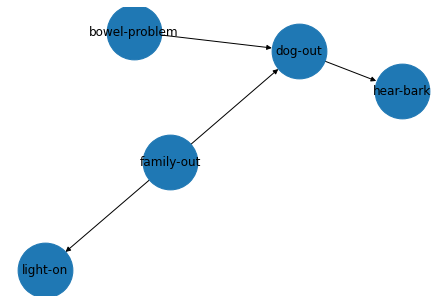

In [5]:
dogproblem.draw_structure()

In [6]:
dogproblem.get_all_variables()

['light-on', 'bowel-problem', 'dog-out', 'hear-bark', 'family-out']

In [7]:
dogproblem.get_all_cpts()

{'light-on':    family-out  light-on     p
 0       False     False  0.60
 1       False      True  0.40
 2        True     False  0.05
 3        True      True  0.95, 'bowel-problem':    bowel-problem     p
 0          False  0.01
 1           True  0.99, 'dog-out':    family-out  bowel-problem  dog-out     p
 0       False          False    False  0.99
 1       False          False     True  0.01
 2       False           True    False  0.97
 3       False           True     True  0.03
 4        True          False    False  0.90
 5        True          False     True  0.10
 6        True           True    False  0.30
 7        True           True     True  0.70, 'hear-bark':    dog-out  hear-bark     p
 0    False      False  0.70
 1    False       True  0.30
 2     True      False  0.01
 3     True       True  0.99, 'family-out':    family-out     p
 0       False  0.15
 1        True  0.85}

In [8]:
dogproblem.get_children('light-on')

[]

In [9]:
dogproblem.get_all_edges()

[('bowel-problem', 'dog-out'),
 ('dog-out', 'hear-bark'),
 ('family-out', 'light-on'),
 ('family-out', 'dog-out')]

## a) d-separation 

In [10]:
reasoner = BNReasoner(dogproblem)

In [11]:
x = ['bowel-problem', 'family-out']
y = ['hear-bark', 'light-on']
z = ['dog-out']
reasoner.d_separation(x, y, z)

False

## b) Ordering

Mindegree heuristic: 


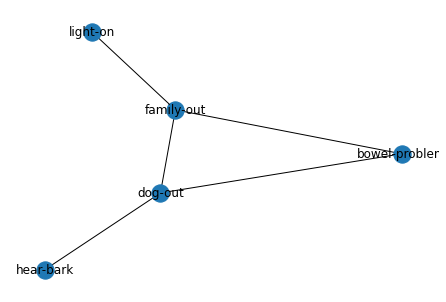

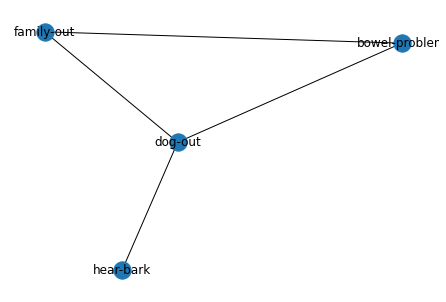

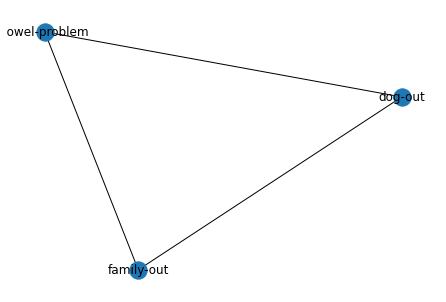

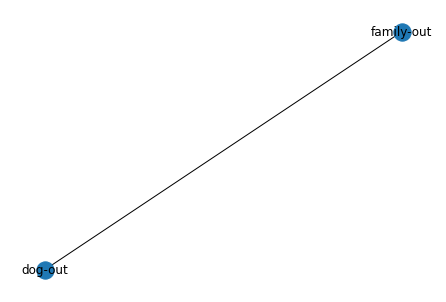

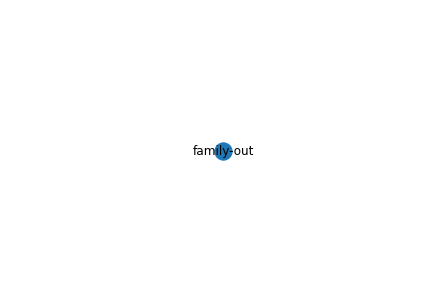

['light-on', 'hear-bark', 'bowel-problem', 'dog-out', 'family-out']

In [12]:
print('Mindegree heuristic: ')
reasoner.ordering_mindegree()

Minfill heuristic: 


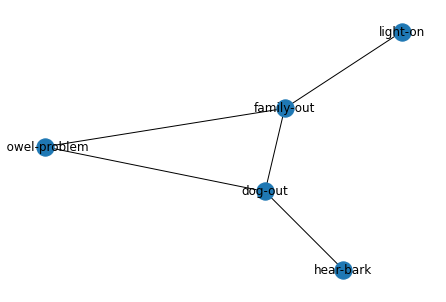

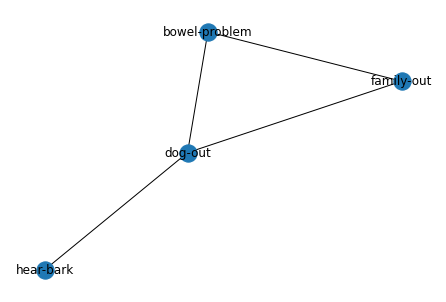

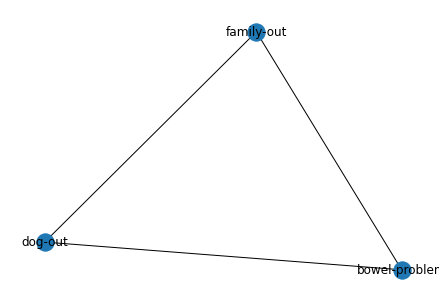

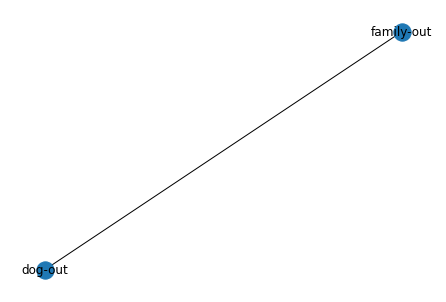

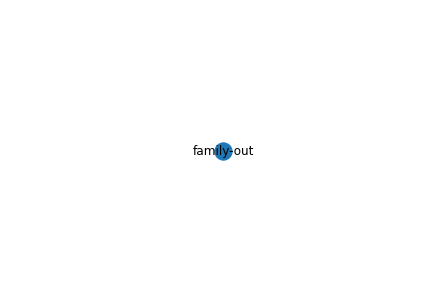

['light-on', 'hear-bark', 'bowel-problem', 'dog-out', 'family-out']

In [13]:
print('Minfill heuristic: ')

reasoner.ordering_minfill()

# c) Network Pruning

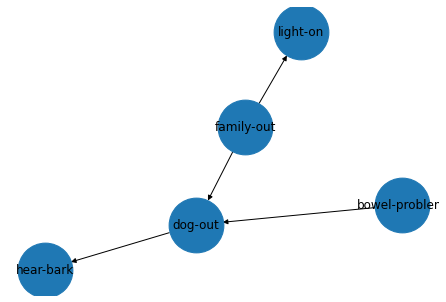

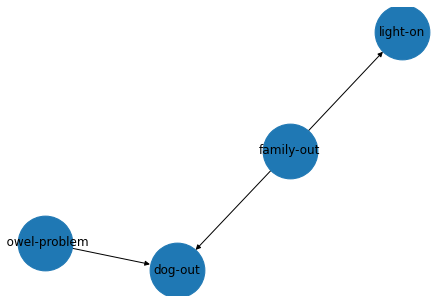

C:\Users\Valen\Documents\Master AI VU\KR\KR-Project2\BNReasoner.py:194: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  new_cpt = new_cpt.drop(ev[0], 1)


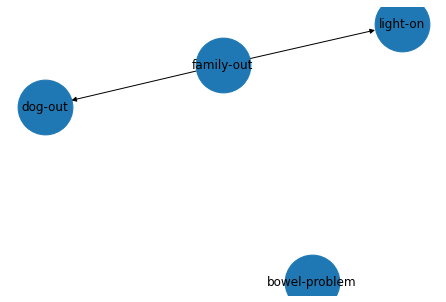

In [14]:
q = ['dog-out']
e = pd.Series({'light-on': True, 'bowel-problem': False})

pruned = reasoner.net_prune(q, e)

In [15]:
pruned.get_cpt('dog-out')

,family-out,dog-out,p
0,False,False,0.99
1,False,True,0.01
4,True,False,0.90
5,True,True,0.10


## d) Marginal distributions

### summing-out: 

In [16]:
factor = dogproblem.get_cpt('dog-out')
factor

,family-out,bowel-problem,dog-out,p
0,False,False,False,0.99
1,False,False,True,0.01
2,False,True,False,0.97
3,False,True,True,0.03
4,True,False,False,0.90
5,True,False,True,0.10
6,True,True,False,0.30
7,True,True,True,0.70


In [17]:
reasoner.sum_out(factor, ['bowel-problem'])

C:\Users\Valen\Documents\Master AI VU\KR\KR-Project2\BNReasoner.py:223: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  summed_out = summed_out.drop(var, 1)


,family-out,dog-out,p
0,False,False,1.96
1,False,True,0.04
2,True,False,1.20
3,True,True,0.80


### multiplying

In [18]:
dog = dogproblem.get_cpt('dog-out')
dog

,family-out,bowel-problem,dog-out,p
0,False,False,False,0.99
1,False,False,True,0.01
2,False,True,False,0.97
3,False,True,True,0.03
4,True,False,False,0.90
5,True,False,True,0.10
6,True,True,False,0.30
7,True,True,True,0.70


In [19]:
bark = dogproblem.get_cpt('hear-bark')
bark

,dog-out,hear-bark,p
0,False,False,0.70
1,False,True,0.30
2,True,False,0.01
3,True,True,0.99


In [20]:
dog = dogproblem.get_cpt('dog-out')
bark = dogproblem.get_cpt('hear-bark')

reasoner.multiply(dog, bark)

,family-out,bowel-problem,dog-out,hear-bark,p
0,True,True,True,True,0.6930
1,True,True,True,False,0.0070
2,True,True,False,True,0.0900
3,True,True,False,False,0.2100
4,True,False,True,True,0.0990
5,True,False,True,False,0.0010
6,True,False,False,True,0.2700
7,True,False,False,False,0.6300
8,False,True,True,True,0.0297
9,False,True,True,False,0.0003


In [21]:
reasoner.multiply(bark, dog)

,dog-out,hear-bark,bowel-problem,family-out,p
0,True,True,True,True,0.6930
1,True,True,True,False,0.0297
2,True,True,False,True,0.0990
3,True,True,False,False,0.0099
4,True,False,True,True,0.0070
5,True,False,True,False,0.0003
6,True,False,False,True,0.0010
7,True,False,False,False,0.0001
8,False,True,True,True,0.0900
9,False,True,True,False,0.2910


### get marginal

In [22]:
evidence = pd.DataFrame([{"bowel-problem": False, "family-out": False}])
query_vars = ["dog-out", "light-on"]

marginals = reasoner.get_marginal(query_vars, evidence)
#print(marginals['light-on'])

[     p  light-on
0  0.6     False
1  0.4      True,       p  dog-out
0  0.99    False
1  0.01     True]


C:\Users\Valen\Documents\Master AI VU\KR\KR-Project2\BNReasoner.py:223: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  summed_out = summed_out.drop(var, 1)


In [23]:
marginals

,p,dog-out,light-on
0,0.006,True,False
1,0.594,False,False
2,0.004,True,True
3,0.396,False,True


In [26]:
reasoner.maxx_out(bark, ['hear-bark', 'dog-out'])

ValueError: No group keys passed!

In [25]:
bark

,dog-out,hear-bark,p
0,False,False,0.70
1,False,True,0.30
2,True,False,0.01
3,True,True,0.99
